In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr, spearmanr

# 1st Recommender (KNN)

In [2]:
rating = pd.read_csv('../data/ratings.csv')
movies = pd.read_csv('../data/movies.csv')

In [3]:
final_dataset = rating.pivot(index='movieId',columns='userId',values='rating')
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
no_user_voted = rating.groupby('movieId')['rating'].agg('count')
no_movies_voted = rating.groupby('userId')['rating'].agg('count')

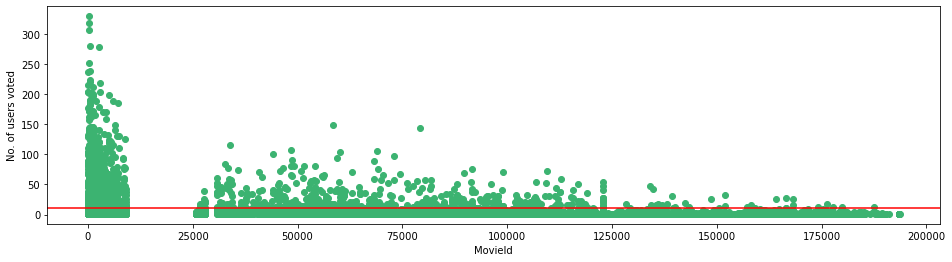

In [5]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [6]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

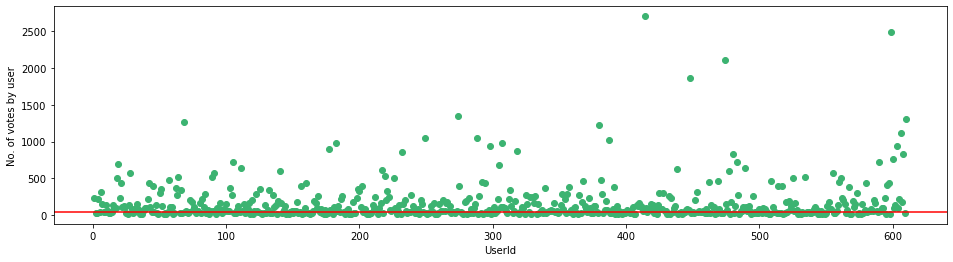

In [7]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [8]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [10]:
from scipy.sparse import csr_matrix
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [11]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [12]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [13]:
def recommend_similar_movies_to(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        test = df.sort_values(['Distance'],axis=0, ascending=[True])
        return test
    else:
        return "No movies found. Please check your input"


By using user voting data to recommend similar movies

In [14]:
recommend_similar_movies_to('Inception')

,Title,Distance
10,"Dark Knight, The (2008)",0.213876
9,Inglourious Basterds (2009),0.305288
8,"Dark Knight Rises, The (2012)",0.335075
7,"Avengers, The (2012)",0.340302
6,Shutter Island (2010),0.345888
5,Django Unchained (2012),0.362976
4,Sherlock Holmes (2009),0.366418
3,Fight Club (1999),0.367898
2,Iron Man (2008),0.369175
1,"Hangover, The (2009)",0.369214


# 2nd Recommender (TFIDF)
By using user voting history to recommend similar movies

In [15]:
user_movie_content = pd.DataFrame(columns=[_ for _ in movies.movieId.unique()], index=[_ for _ in rating.userId.unique()])
user_movie_content = user_movie_content.replace({np.nan: 0})

In [16]:
for i in range(rating.shape[0]):
  user_movie_content.iloc[int(rating.iloc[i]['userId'])-1][int(rating.iloc[i]['movieId'])] = rating.iloc[i]['rating']

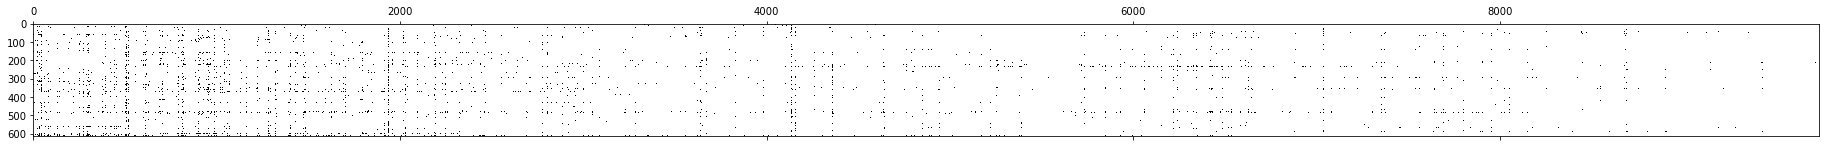

In [17]:
fig = plt.figure(figsize=(32,32))
plt.spy(user_movie_content)

In [18]:
!pip install scikit-surprise

In [19]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

In [20]:
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise import CoClustering
from surprise import SlopeOne
from surprise.model_selection import cross_validate


algo1 = SVD()
algo2 = KNNBasic()
algo3 = NMF()
algo4 = CoClustering()
algo5 = SlopeOne()

# Run 5-fold cross-validation and print results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


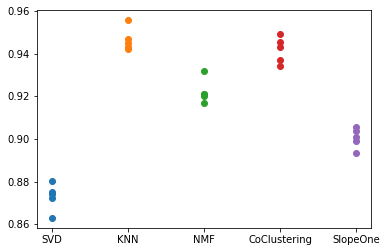

In [21]:
import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')

In [22]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
trainset = data.build_full_trainset()
algo1.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo1.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Content Based Filtering

In [ ]:
# Genres
all_genres = [s.split("|") for s in movies[movies.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
print (f"total of {len(unique_genres)} unique genres from {len(genres)} occurances.")
pd.Series(genres).value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("# of movies per genre")
plt.ylabel("# of movies")
plt.xlabel("genre")
plt.show()

In [ ]:
movie_profile = movies[['movieId', 'title', 'genres']]
genres = [item.strip() for l in all_genres for item in l ]
unique_genres = set(genres)
for genre in unique_genres:
  movie_profile[genre] = 0

In [ ]:
movie_profile.head()

In [ ]:
for i in range(len(movie_profile)):
  if type(movie_profile['genres'].iloc[i]) != None.__class__:
    Genres = movie_profile.iloc[i].genres.split('|')
    for g in Genres:
      movie_profile[g].iloc[i] = 1

In [ ]:
movie_profile.tail()

In [ ]:
movie_profile = movie_profile.drop(columns=['title', 'genres']).set_index('movieId')

In [ ]:
user_x_movie = pd.pivot_table(rating, values='rating', index=['movieId'], columns = ['userId'])

In [ ]:
movie_profile.sort_index(axis=0, inplace=True)
movie_profile.head()

In [ ]:
user_x_movie.sort_index(axis=0, inplace=True)
user_x_movie

In [ ]:
from tqdm import tqdm

userIDs = user_x_movie.columns
user_profile = pd.DataFrame(columns = movie_profile.columns)

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = movie_profile.mul(user_x_movie.iloc[:,i], axis=0)
  # working_df.replace(0, np.NaN, inplace=True)    
  user_profile.loc[userIDs[i]] = working_df.mean(axis=0)

In [ ]:
user_profile

In [ ]:
df = movie_profile.sum()
idf = (len(movies)/df).apply(np.log) #log inverse of DF

In [ ]:
df

In [ ]:
idf

In [ ]:
TFIDF = movie_profile.mul(idf.values)
TFIDF

In [ ]:
df_predict = pd.DataFrame()

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = TFIDF.mul(user_profile.iloc[i], axis=1)
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1)

In [ ]:
df_predict

In [ ]:
def recommendation_for_user(user_no):
  #user predicted rating to all films
  user_predicted_rating = df_predict[df_predict.columns[user_no - 1]]

  #combine film rating and film detail
  user_rating_film = pd.merge(user_predicted_rating, movies, left_on='movieId', right_on='movieId')

  #films already watched by user
  already_watched = rating[rating['userId'].isin([user_no])]['movieId']

  #recommendation without films being watched by user
  all_rec = user_rating_film[~user_rating_film.index.isin(already_watched)]
  
  return all_rec.sort_values(by=[user_no], ascending=False).iloc[0:10][['movieId', 'title']]

In [ ]:
recommendation_for_user(54)

# 3rd Recommender Using Description

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
#from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

In [ ]:

md = pd.read_csv('../data/top.csv')


In [ ]:
md.head()

In [ ]:
md.iloc[0:3].transpose()

In [ ]:
md.columns

In [ ]:
md.shape

In [ ]:
md.info()

In [ ]:
smd = md
smd.shape

In [ ]:
smd['description'] = smd['description'].fillna('')

In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [ ]:
tfidf_matrix.shape

In [ ]:
# http://scikit-learn.org/stable/modules/metrics.html#linear-kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim[0]
#cosine_sim.shape

In [ ]:
smd = smd.reset_index()
titles = smd['movie']
indices = pd.Series(smd.index, index=smd['movie'])

In [ ]:
def get_recommendations_desc(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
get_recommendations_desc('Inception').head(10)

In [ ]:
get_recommendations_desc('The Dark Knight').head(10)

# 4th Recommender using Description, Director, Cast, Genre

In [ ]:


smd['soup'] = smd['description'] + smd['director'] + smd['genre'] + smd['star']+ smd['director']


In [ ]:
import string
string.punctuation

In [ ]:
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct



smd['soup_clean'] = smd['soup'].apply(lambda x: remove_punct(x))

In [ ]:
import re

def tokenize(text):
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    return tokens

smd['soup_clean_token'] = smd['soup'].apply(lambda x: tokenize(x.lower()))

In [ ]:
import nltk

# NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    # Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenized_list if word not in stopword]
    return text

smd['soup_clean_nostop'] = smd['soup_clean_token'].apply(lambda x: remove_stopwords(x))

In [ ]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

smd['soup_clean_lemmatized'] = smd['soup_clean_nostop'].apply(lambda x: lemmatizing(x))


In [ ]:
wn = nltk.WordNetLemmatizer()
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def clean_text_eda(text):
    text = " ".join([word.lower() for word in text if word not in string.punctuation])
    #Requires a full sentence to be passed in as opposed to a tokenized list
    tokens = re.split('\W+', text)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords])
    return text

smd['done'] = smd['soup_clean_lemmatized'].apply(lambda x: clean_text_eda(x))

print(smd.loc[4,:])

In [ ]:
cvec = CountVectorizer()
# fit on depression posts
result_features = cvec.fit_transform(smd['done'])
# convert to dataframe
result_features_df = pd.DataFrame(result_features.toarray(), columns = cvec.get_feature_names())
# get the most frequently occuring words for depression
result_words = result_features_df.sum().sort_values().tail(30)

In [ ]:
# plot most frequently occuring words
result_words.plot(x='word', y='exp_coef', kind='barh', figsize=(15, 8), legend=None, color='cornflowerblue')
plt.title("Top 20 Frequently Occurring Words", size=16, y=1.01)
plt.ylabel('Word', size=12)
plt.yticks(size=14)
plt.tight_layout();


In [ ]:
count = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['done'])

In [ ]:
cosine_sim1 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
#smd = smd.reset_index()
titles = smd['movie']
indices = pd.Series(smd.index, index=smd['movie'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim1[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
recommend_similar_movies_to('Inception')

In [ ]:
recommendation_for_user(54)

In [ ]:
get_recommendations_desc('Inception').head(20)

In [ ]:
get_recommendations('Inception').head(10)

In [ ]:
def final(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim1[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    movies = smd.iloc[movie_indices][['movie','year', 'rating', 'score', 'votes', 'gross', 'genre']]
    return movies.head(10)

In [ ]:
final('Inception')

In [ ]:
final('Star Wars: Episode VII - The Force Awakens')

In [ ]:
final('Avatar')